Here's what's going down.  Imma test various component numbers and feed them to the forest.  I'll use a testing size of 0.2 and hope I'm not overfitting, and like 25 trees, turn off OOB for now because I hate the error messages.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#We have to get rid of the 'sex' column for now, PCA won't dig it.
#df = pd.get_dummies(df, columns = ['sex'])
df.drop('sex', axis=1, inplace=True)

y = df['rings']
X = df.drop('rings', axis=1)

In [2]:
#This one creates new training and testing sets each time.
def forest1(X, y, tsize, numtrees, text=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0)
    
    model = RandomForestClassifier(n_estimators=numtrees, oob_score=False).fit(X_train,y_train)
    score = model.score(X_test,y_test)

    if text == True:
        print('With testing size ' + str(tsize) + ' and forest size of ' + str(numtrees) +' score = '+ str(score))

    return score

In [ ]:
#Creates and scores a model with given train/test sets
def forest2(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=25, oob_score=False).fit(X_train,y_train)
    score = model.score(X_test,y_test)

    return score

In [4]:
#scales and performs pca on prepared dataframe
def scaled_pca(dataframe, components):
    scaled = StandardScaler().fit_transform(dataframe)
    pca = PCA(n_components=components, svd_solver='full')
    x = pca.fit(scaled).transform(scaled)
    return x

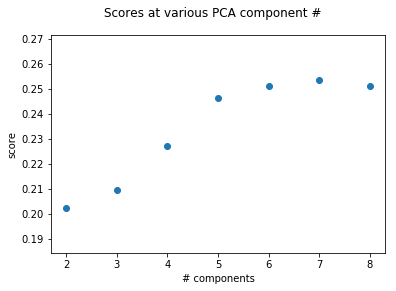

In [34]:
#explore possible variations
#forest1(X, y, tsize, numtrees, text=True)

num_components = list(range(2,9,1))
scores = []
count = 0

#for testing component numbers from 7 to 2

while count < 8:
    for num in list(range(2,8,1)):
        scaled = scaled_pca(X, num)
        score = forest1(scaled, y, 0.2, 25, text=False)
        scores.append(score)
        count = count+1
    else:
        scaled = StandardScaler().fit_transform(X)
        score = forest1(scaled, y, 0.2, 25, text=False)
        scores.append(score)
        break
        
plt.scatter(x=num_components, y=scores)
plt.suptitle('Scores at various PCA component #')
plt.xlabel('# components')
plt.ylabel('score')
plt.show()

#Well that was unhelpful.

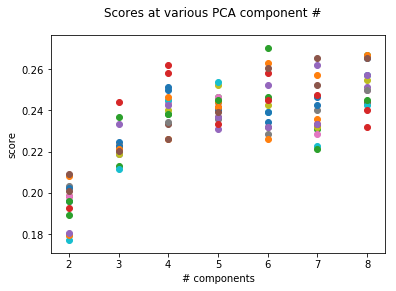

In [39]:
#for testing PCA component numbers from 7 to 2, 
#and running each condition various times to observe
#variation introduced from the unique testing/training sets.

#Axes for plotting
num_components = list(range(2,9,1))
scores = []

#loop control; count tests the various PCA conditions, 
#test controls sample size for each condition.
count = 0
test = 0

while test <= 15:
    while count < 8:
        for num in list(range(2,8,1)):
            scaled = scaled_pca(X, num)
            score = forest1(scaled, y, 0.2, 25, text=False)
            scores.append(score)
            count = count+1
        else:
            scaled = StandardScaler().fit_transform(X)
            score = forest1(scaled, y, 0.2, 25, text=False)
            scores.append(score)
            break
       
    plt.scatter(x=num_components, y=scores)
    test = test+1 
    count = 0
    scores = []

plt.suptitle('Scores at various PCA component #')
plt.xlabel('# components')
plt.ylabel('score')
plt.show()

Annoying, but interesting!  With a testing proportion of 0.20 and forest size of 25, X is scaled and run through PCA at various sizes.  Component #8 is not run through PCA, but still scaled.  Each component number condition was run 15 times to observe the variation produced by picking different training and testing sets.

Does the variation mean there are outliers that are messing with the information?

...does y need to be scaled?